In [363]:
#Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [364]:
#Load dataset as a pandas data frame.
df_healthcare = pd.read_csv("Healthcare_Dataset.csv", sep=",")

In [365]:
df_healthcare.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [366]:
#Check for null values across columns
df_healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [367]:
#Print out the unique values for each column in the dataset.
#We can see that the columns do not have values that are incorrectly measured.
for i in df_healthcare.columns:
    print(i, ":", df_healthcare[i].unique())

Ptid : ['P1' 'P2' 'P3' ... 'P3422' 'P3423' 'P3424']
Persistency_Flag : ['Persistent' 'Non-Persistent']
Gender : ['Male' 'Female']
Race : ['Caucasian' 'Asian' 'Other/Unknown' 'African American']
Ethnicity : ['Not Hispanic' 'Hispanic' 'Unknown']
Region : ['West' 'Midwest' 'South' 'Other/Unknown' 'Northeast']
Age_Bucket : ['>75' '55-65' '65-75' '<55']
Ntm_Speciality : ['GENERAL PRACTITIONER' 'Unknown' 'ENDOCRINOLOGY' 'RHEUMATOLOGY'
 'ONCOLOGY' 'PATHOLOGY' 'OBSTETRICS AND GYNECOLOGY'
 'PSYCHIATRY AND NEUROLOGY' 'ORTHOPEDIC SURGERY'
 'PHYSICAL MEDICINE AND REHABILITATION' 'SURGERY AND SURGICAL SPECIALTIES'
 'PEDIATRICS' 'PULMONARY MEDICINE' 'HEMATOLOGY & ONCOLOGY' 'UROLOGY'
 'PAIN MEDICINE' 'NEUROLOGY' 'RADIOLOGY' 'GASTROENTEROLOGY'
 'EMERGENCY MEDICINE' 'PODIATRY' 'OPHTHALMOLOGY' 'OCCUPATIONAL MEDICINE'
 'TRANSPLANT SURGERY' 'PLASTIC SURGERY' 'CLINICAL NURSE SPECIALIST'
 'OTOLARYNGOLOGY' 'HOSPITAL MEDICINE' 'ORTHOPEDICS' 'NEPHROLOGY'
 'GERIATRIC MEDICINE' 'HOSPICE AND PALLIATIVE MEDICINE'


In [368]:
for i in df_healthcare.columns:
    if(df_healthcare[i].unique().shape[0] ==2):
        df_healthcare[i] = df_healthcare[i].map({df_healthcare[i].unique()[0]:0, df_healthcare[i].unique()[1]:1})  

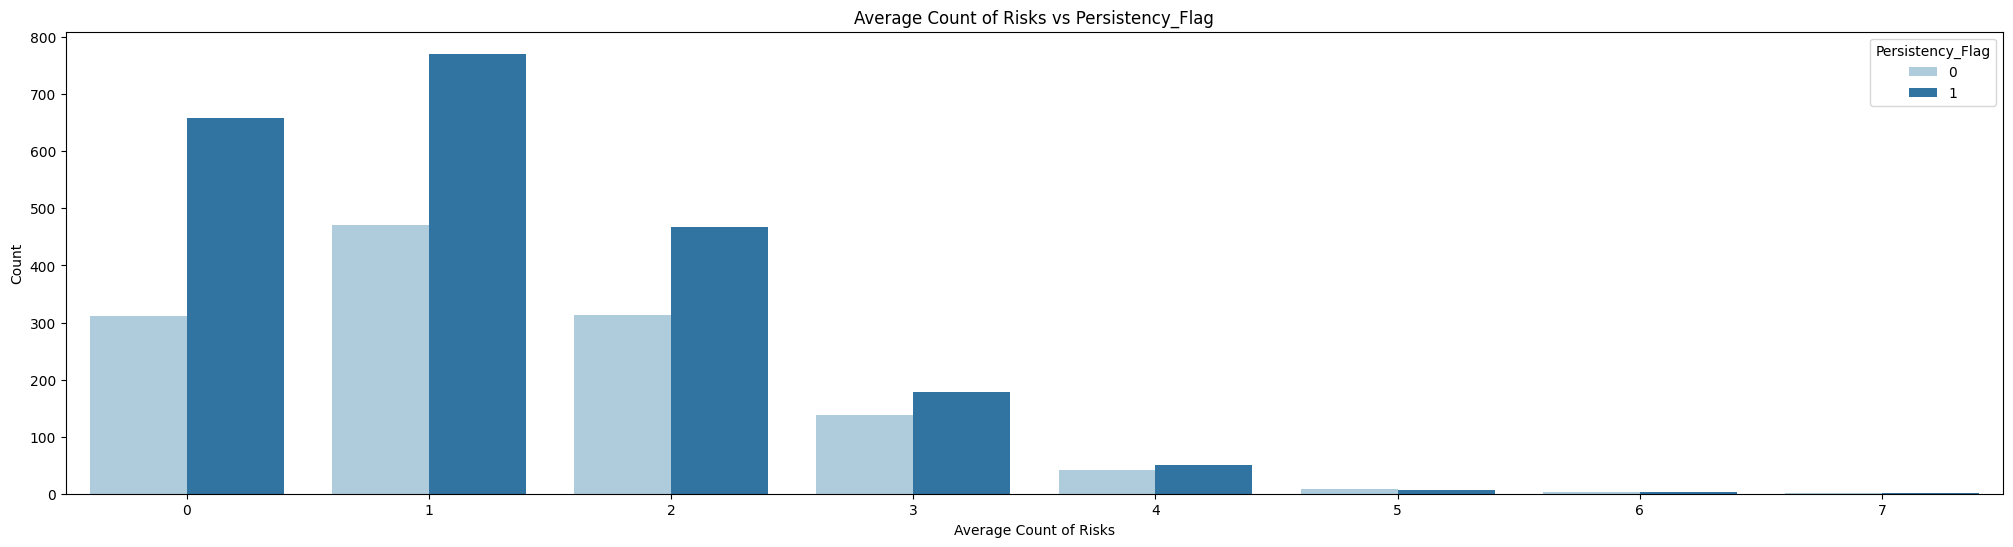

In [369]:
#Count of Risks vs Persistency Flag
custom_palette=sns.color_palette("Paired")
sns.set_palette(custom_palette)
plt.figure(figsize=(25,6))
sns.countplot(x='Count_Of_Risks', data=df_healthcare, hue="Persistency_Flag")
plt.title('Average Count of Risks vs Persistency_Flag')
plt.xlabel('Average Count of Risks')
plt.ylabel('Count')
plt.show()

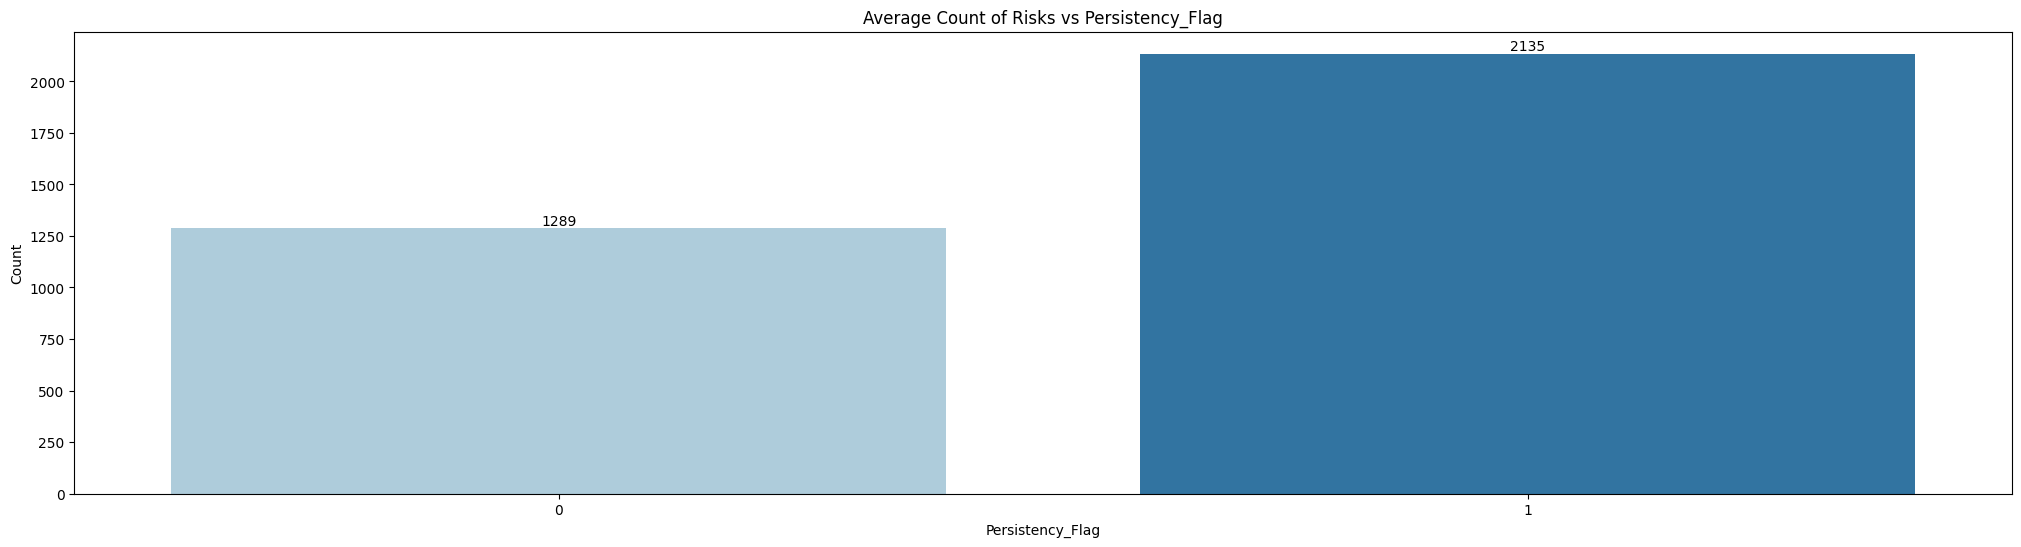

In [370]:
#Count of Each Persistency Flag
plt.figure(figsize=(25,6))
ax=sns.countplot( x='Persistency_Flag', data=df_healthcare)
ax.bar_label(ax.containers[0])
plt.title('Average Count of Risks vs Persistency_Flag')
plt.xlabel('Persistency_Flag')
plt.ylabel('Count')
plt.show()

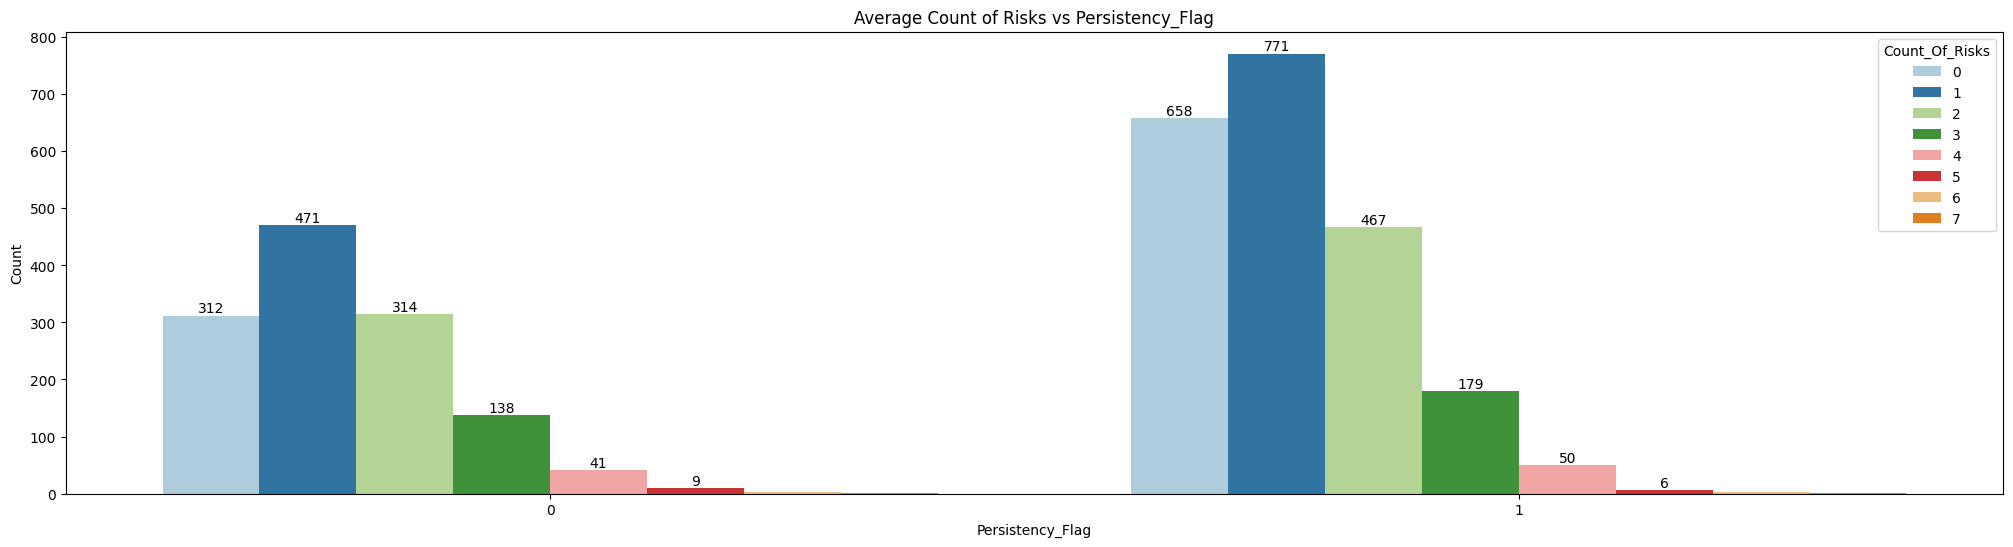

In [371]:
#Count of Risks vs Persistency Flag

plt.figure(figsize=(25,6))
ax=sns.countplot( x='Persistency_Flag', data=df_healthcare, hue='Count_Of_Risks')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
ax.bar_label(ax.containers[5])

plt.title('Average Count of Risks vs Persistency_Flag')
plt.xlabel('Persistency_Flag')
plt.ylabel('Count')
plt.show()

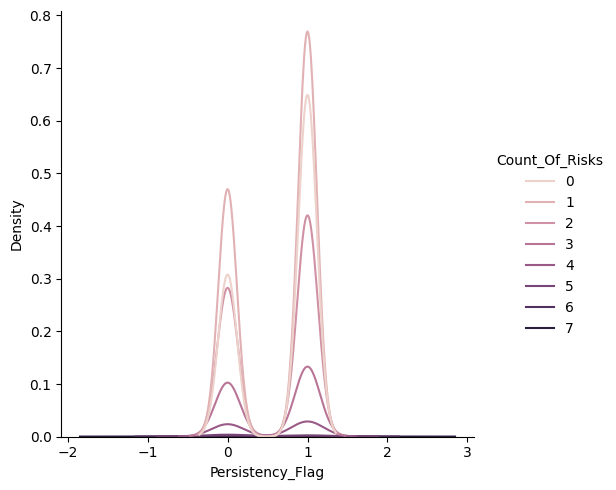

In [372]:
sns.displot(df_healthcare, x="Persistency_Flag", hue="Count_Of_Risks", kind="kde")

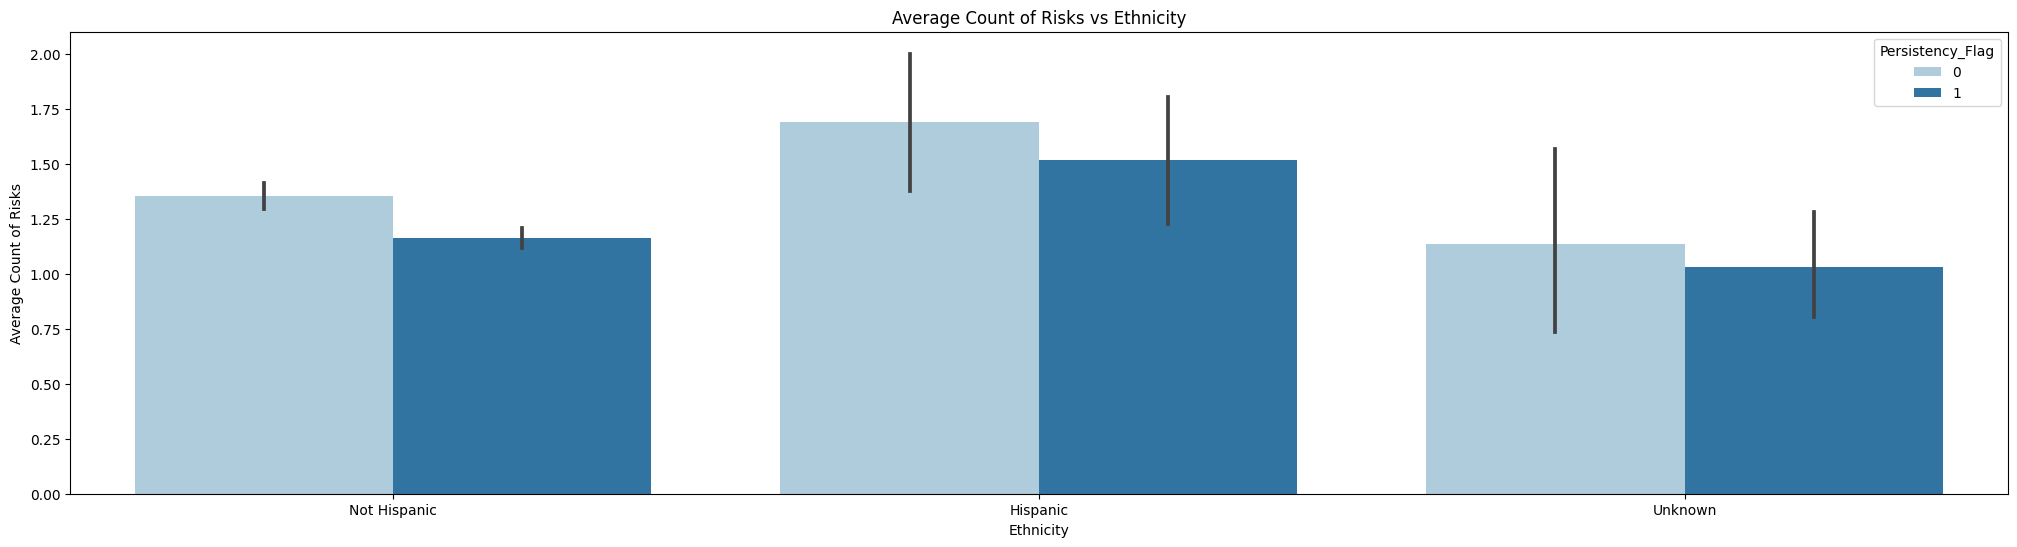

In [373]:
#Count of Risks vs Ethnicity

plt.figure(figsize=(25,6))
sns.barplot(x='Ethnicity',y='Count_Of_Risks', data=df_healthcare, hue="Persistency_Flag")
plt.title('Average Count of Risks vs Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Average Count of Risks')
plt.show()

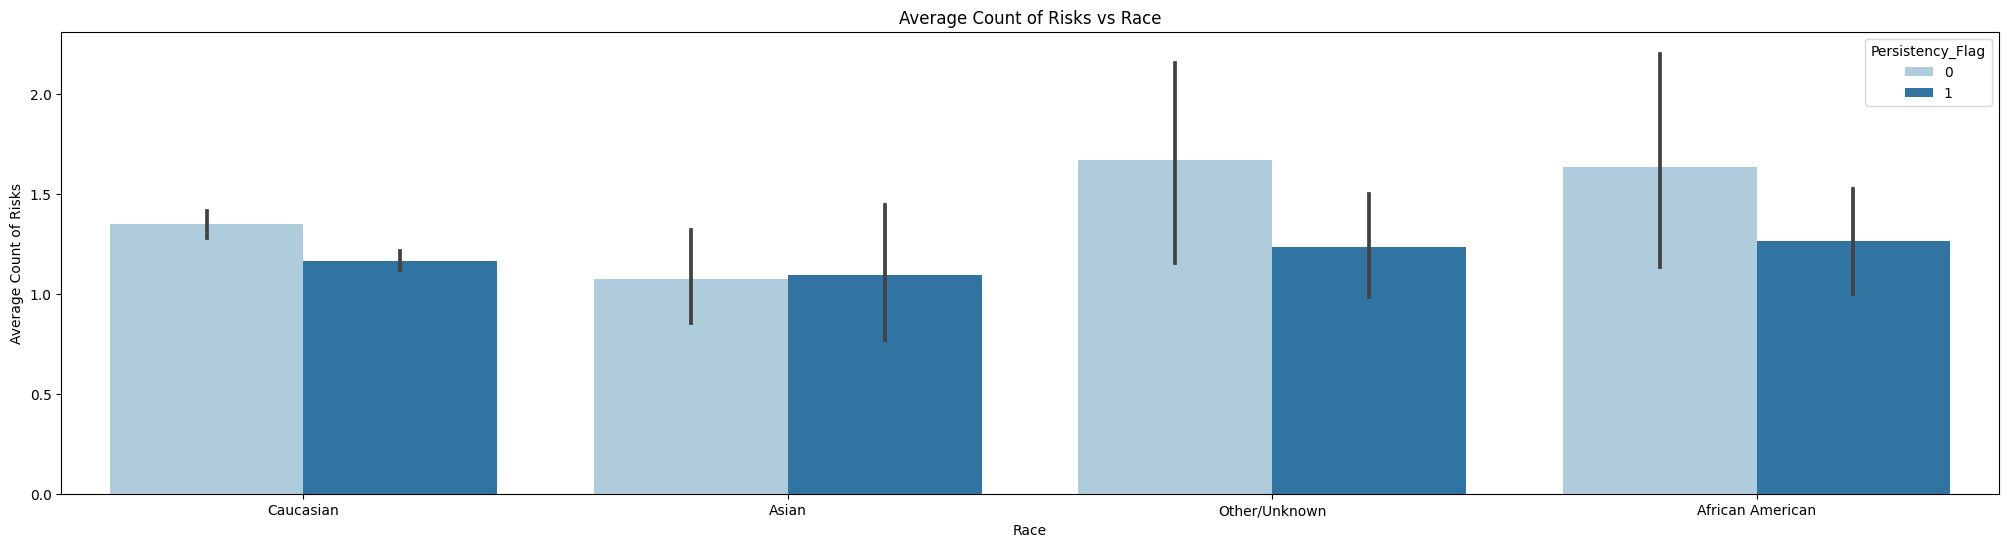

In [374]:
#Count of Risks vs Race

plt.figure(figsize=(25,6))
sns.barplot(x='Race',y='Count_Of_Risks', data=df_healthcare, hue="Persistency_Flag")
plt.title('Average Count of Risks vs Race')
plt.xlabel('Race')
plt.ylabel('Average Count of Risks')
plt.show()

<Figure size 2500x600 with 0 Axes>

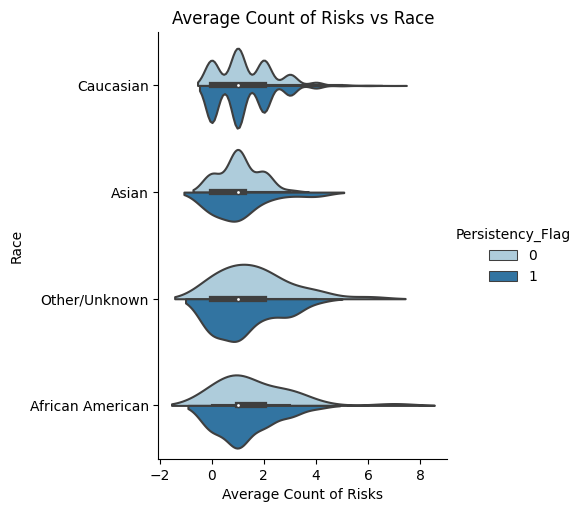

In [375]:
#Count of Risks vs Race
plt.figure(figsize=(25,6))
sns.catplot(y='Race',x='Count_Of_Risks', data=df_healthcare, hue="Persistency_Flag",kind="violin", split=True)
plt.title('Average Count of Risks vs Race')
plt.xlabel('Average Count of Risks')
plt.ylabel('Race')
plt.show()

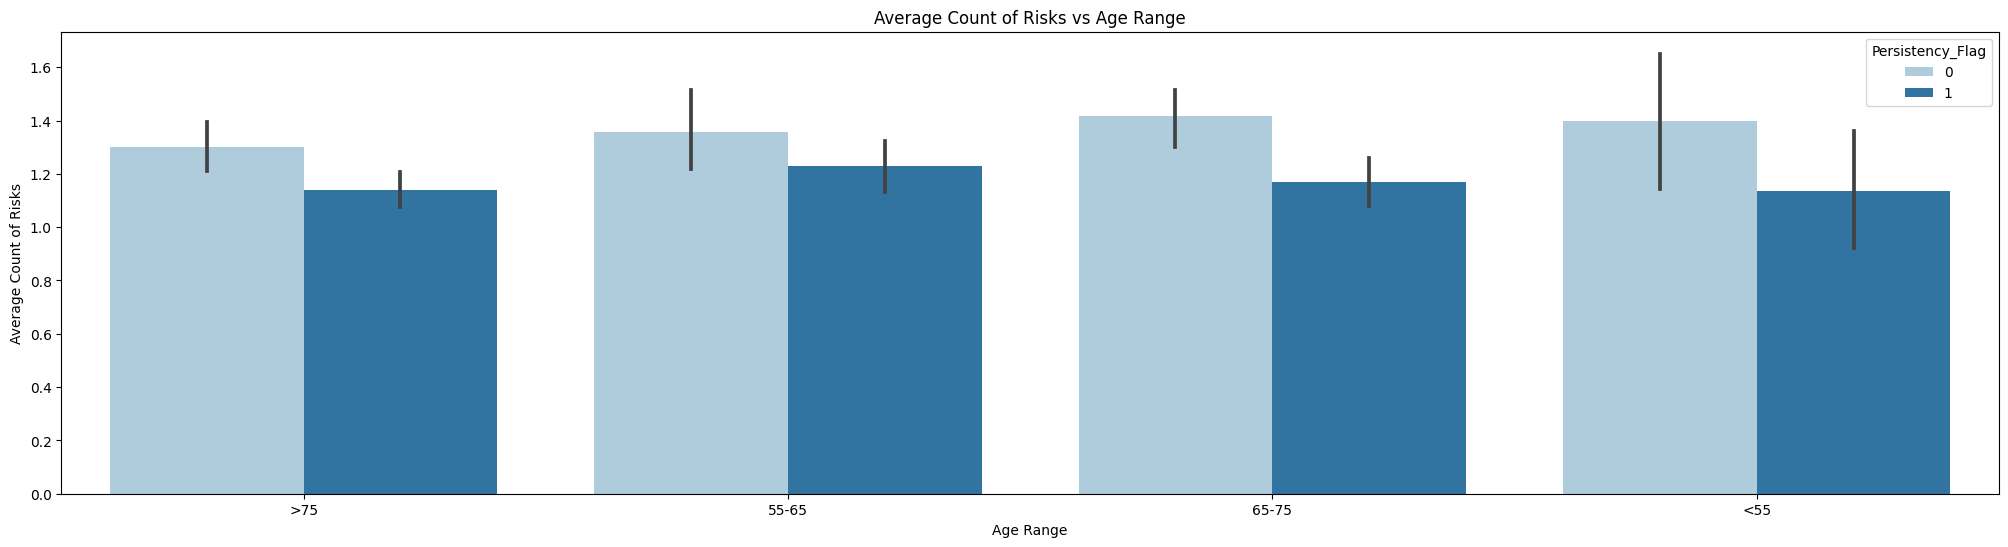

In [376]:
#Count of Risks vs Age Range
plt.figure(figsize=(25,6))
sns.barplot(x='Age_Bucket',y='Count_Of_Risks', data=df_healthcare, hue="Persistency_Flag")
plt.title('Average Count of Risks vs Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Count of Risks')
plt.show()

<Figure size 2500x600 with 0 Axes>

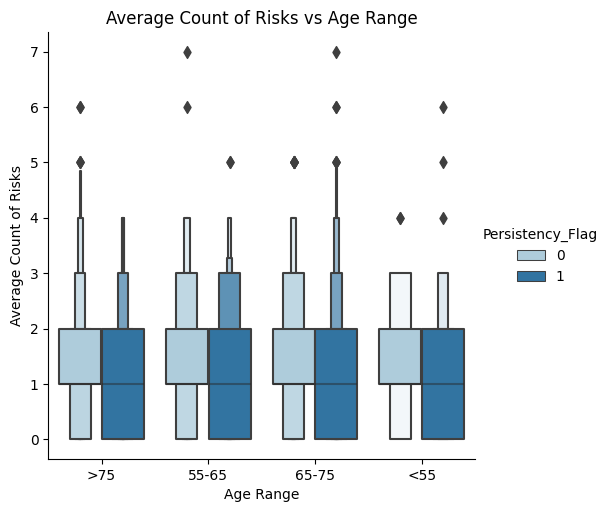

In [377]:
#Count of Risks vs Age Range
plt.figure(figsize=(25,6))
sns.catplot(x='Age_Bucket',y='Count_Of_Risks', data=df_healthcare, hue="Persistency_Flag",kind="boxen")
plt.title('Average Count of Risks vs Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Count of Risks')
plt.show()

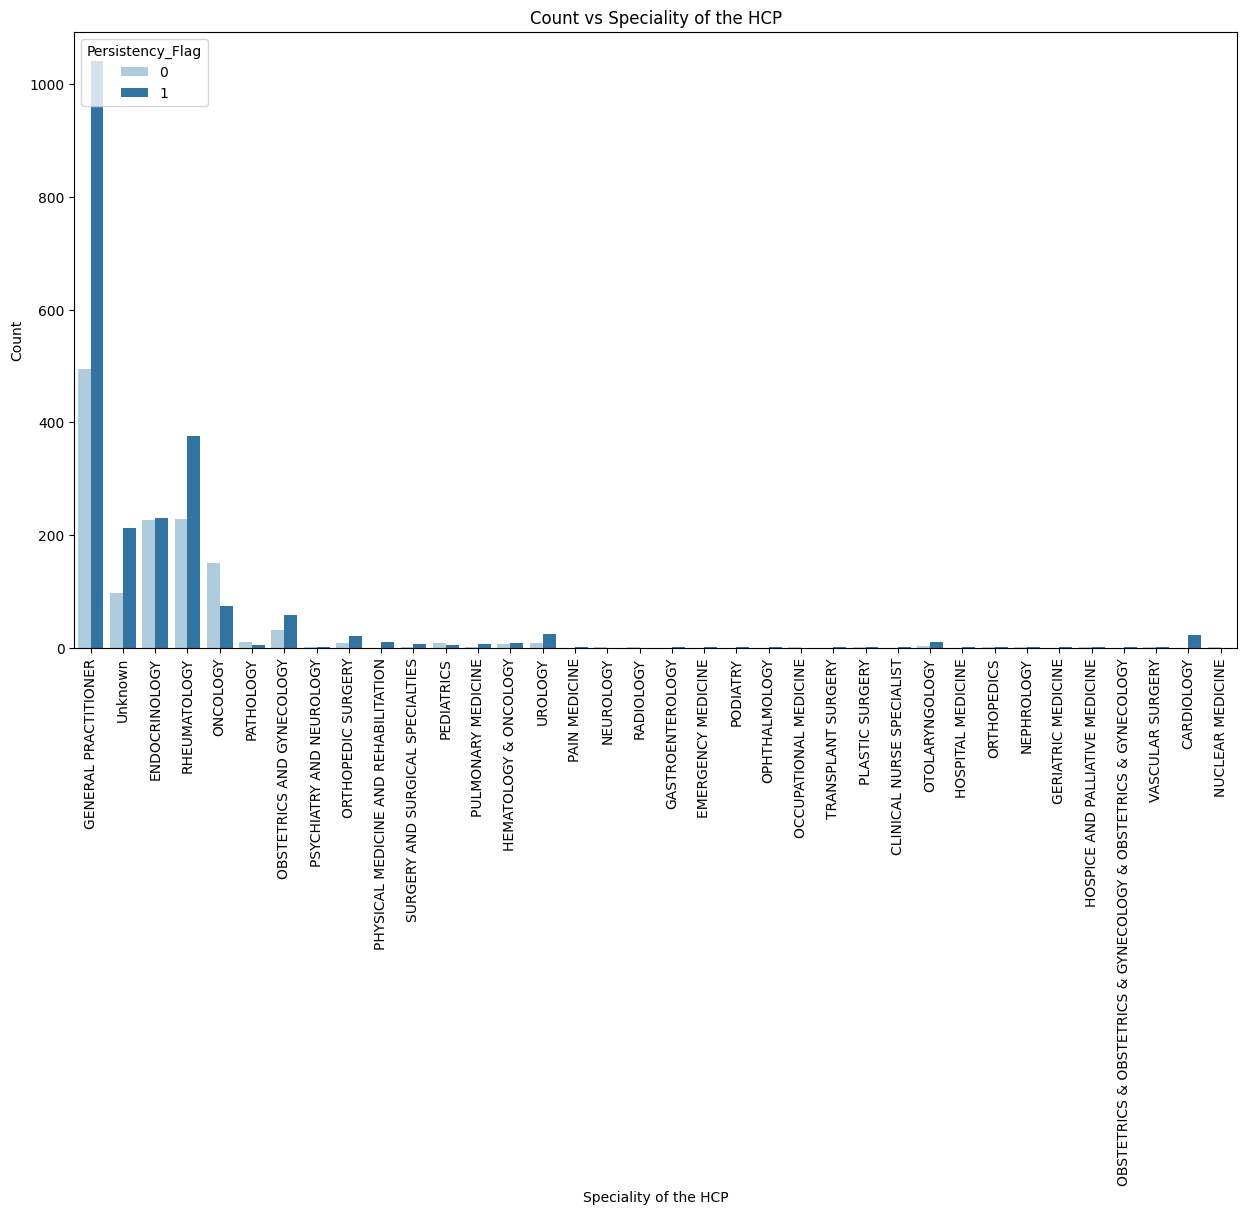

In [378]:
#Specialty of the HCP that prescribed the NTM Rx vs Count

plt.figure(figsize=(15,8))
sns.countplot(x='Ntm_Speciality', data=df_healthcare, hue="Persistency_Flag")
plt.title('Count vs Speciality of the HCP')
plt.xlabel('Speciality of the HCP')
plt.ylabel('Count')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

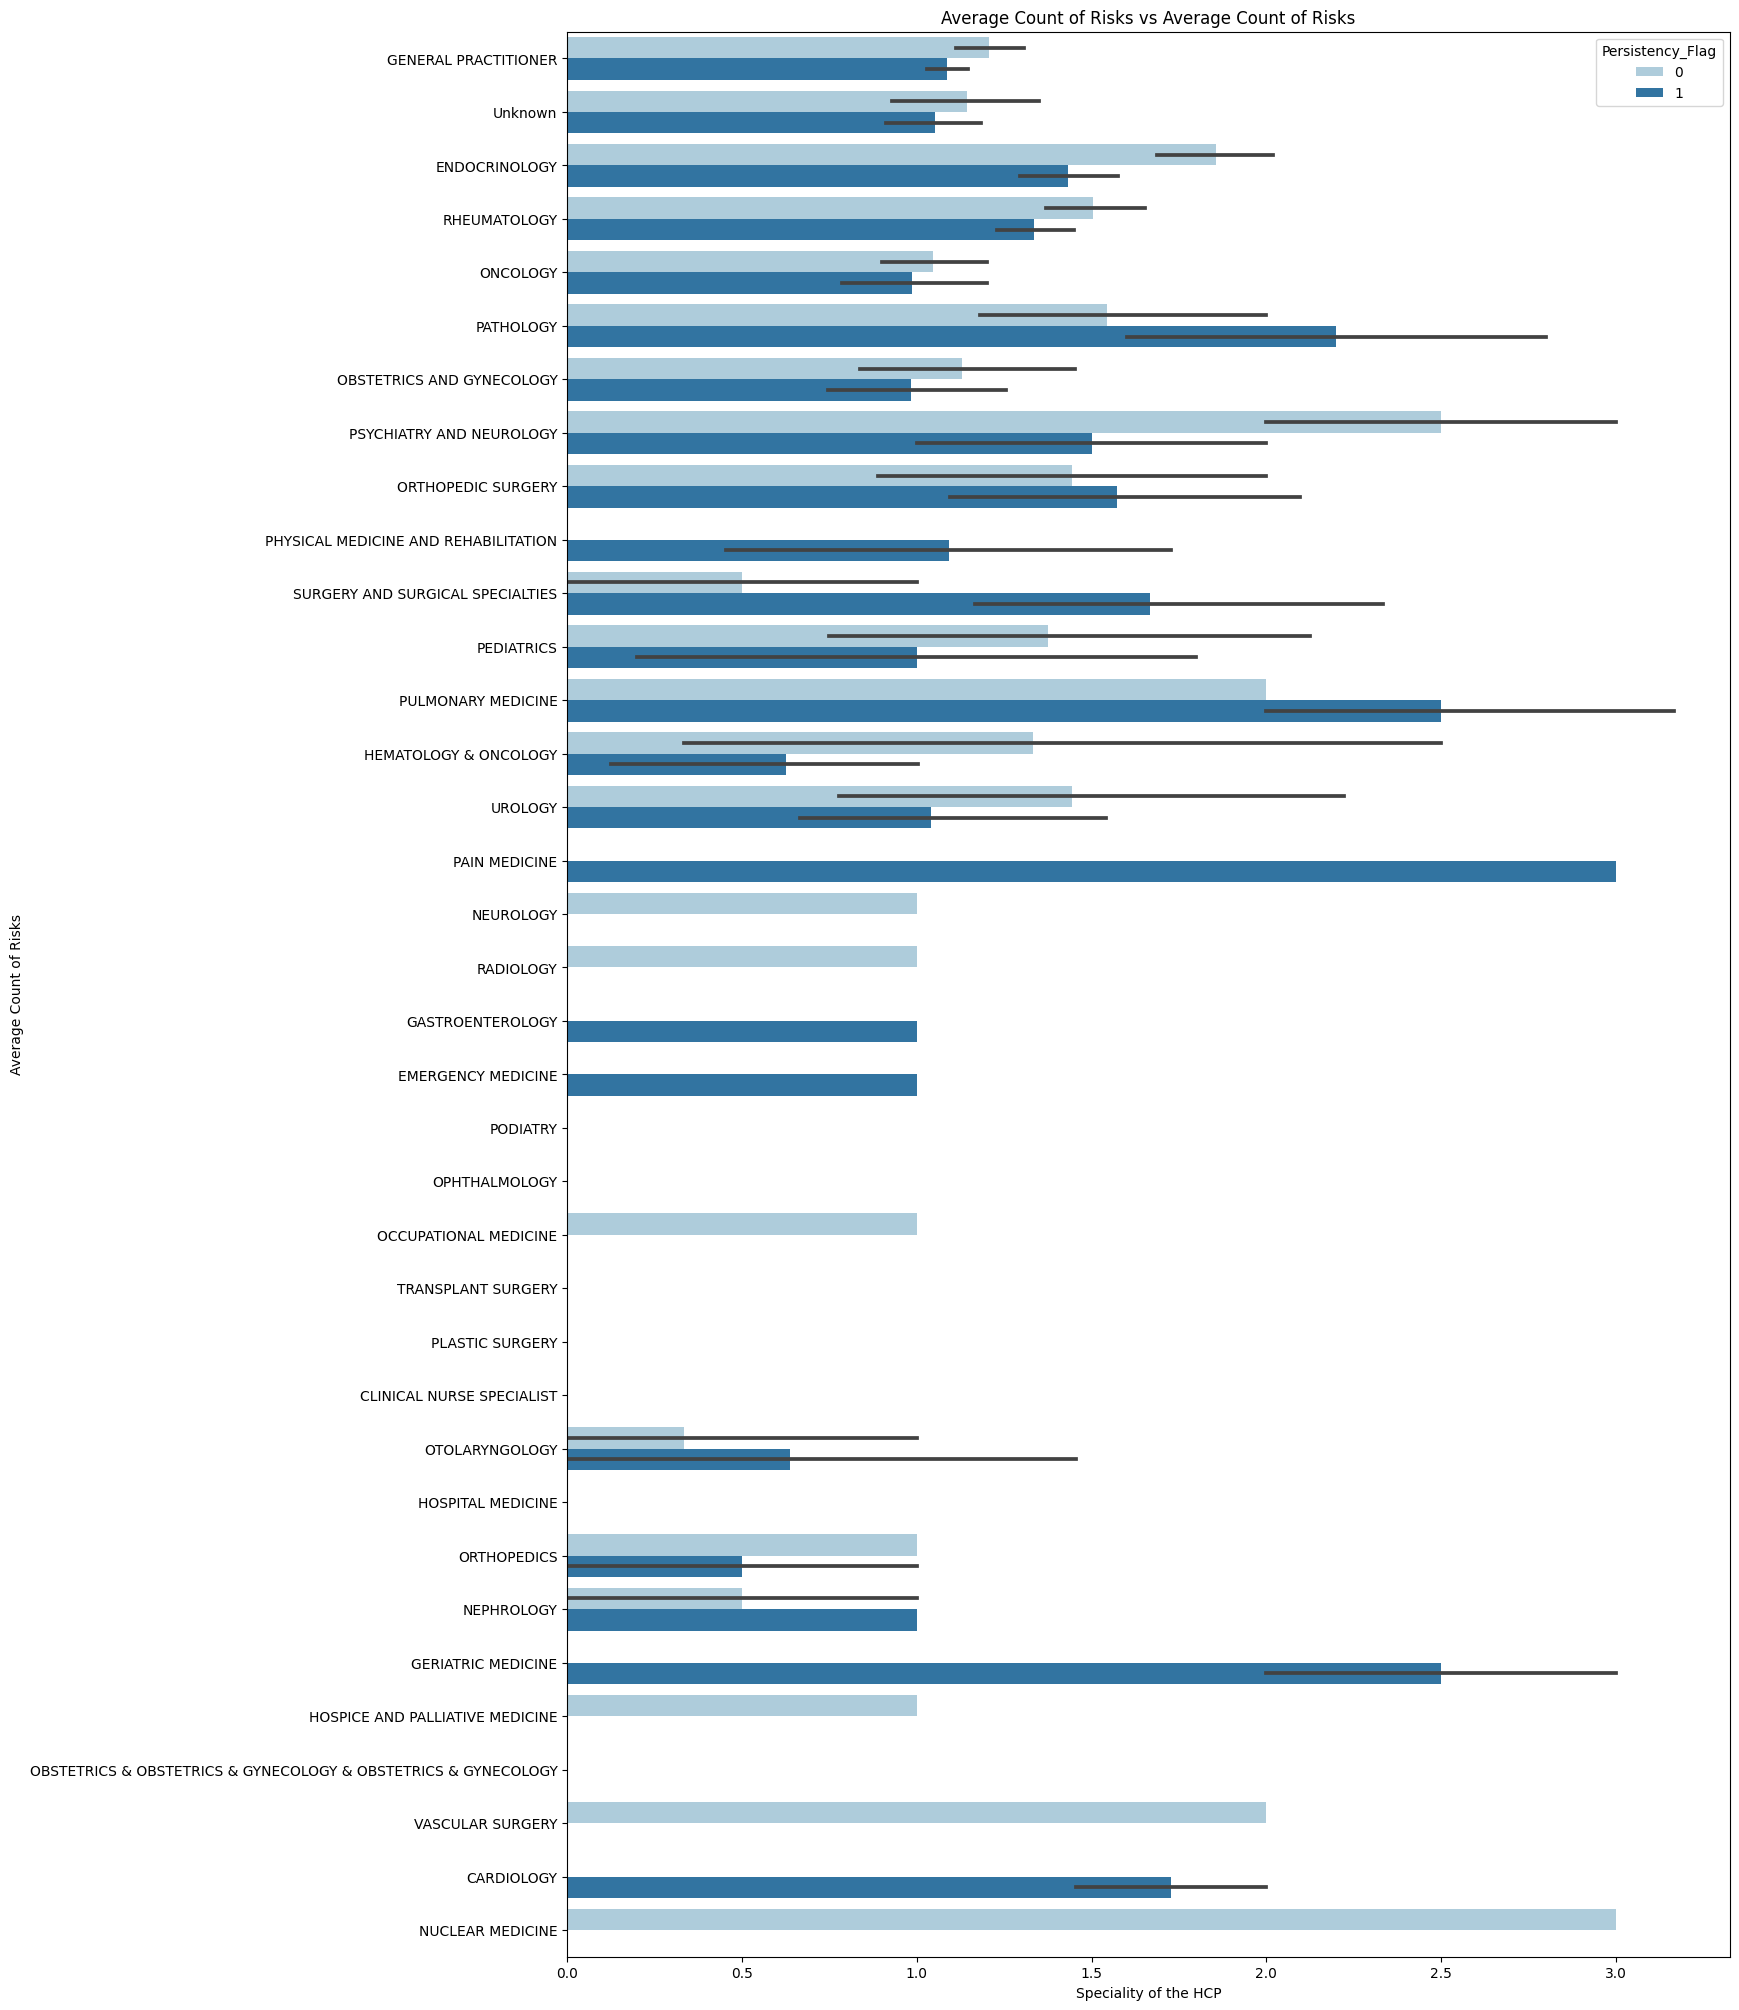

In [379]:
#Count of Risks vs Age Range
plt.figure(figsize=(15,25))
sns.barplot(y='Ntm_Speciality',x='Count_Of_Risks', data=df_healthcare, hue="Persistency_Flag")
plt.title('Speciality of the HCP vs Average Count of Risks')
plt.xlabel('Speciality of the HCP')
plt.ylabel('Average Count of Risks')
plt.show()